In [1]:
import numpy as np                                     # Matlab like syntax for linear algebra and functions
import matplotlib.pyplot as plt                        # Plots and figures like you know them from Matlab
import seaborn as sns                                  # Make the plots nicer to look at
from iminuit import Minuit                             # The actual fitting tool, better than scipy's
import sys                                             # Module to see files and folders in directories
from scipy import stats
from scipy import optimize

In [2]:
sys.path.append('D:\my github\Siyi Applied Stats\Documents for JN\AppStat2021-main\External_Functions\\')
from ExternalFunctions import Chi2Regression
from ExternalFunctions import nice_string_output, add_text_to_ax # useful functions to print fit results on figure

In [3]:
x = [0.1047,0.2864,0.4222,0.5354,0.6343]   # x就是t
y = [0.2154,0.3421,0.4726,0.6019,0.7302]   # y就是位移s         

In [4]:
# 这一段是用最小二乘法画出拟合曲线
def fit_function(x,a,v,s0):  #
    return (1/2)*a*x**2 + v*x + s0
a1,v1,s0_1 = optimize.curve_fit(fit_function,x,y)[0]  # 最小二乘法拟合
x1 = x
print(x1)
print(x)


y1 = np.zeros_like(x1)
for i in range(0,5):
    y1[i] =  (1/2)*a1*(x1[i])**2 + v1*(x1[i]) + s0_1  # x1,y1是拟合值，x,y是观察值

print(y1)
print(y)
print(a1,v1,s0_1)

[0.1047, 0.2864, 0.4222, 0.5354, 0.6343]
[0.1047, 0.2864, 0.4222, 0.5354, 0.6343]
[0.2151008  0.34304314 0.47203963 0.60138628 0.73063015]
[0.2154, 0.3421, 0.4726, 0.6019, 0.7302]
1.5480943698293514 0.40141068614697867 0.16458792741621633


In [5]:
# 利用公式计算卡方
Npoints = 5  # 5个样本
sum1 = np.zeros_like(x)
chi2 = np.zeros_like(x)
sum2 = float
sigmay = float
ey = float

for i in range(0,5):
    sum1[i] = (y1[i]-y[i])**2  # sum1是各项(观察值-拟合值)平方的数组

sum2 = np.sum(sum1)  # sum2是sum1各项的和
sigmay = np.sqrt(sum2/(Npoints - 1))  # sigmay是y的样本标准差
variancey = sigmay**2  # variancey是y的方差
print(variancey)
ey = sigmay
print(ey)
for j in range(0,5):
    chi2[j] += sum1[j]/variancey  # 求各项chi2

Chi2_fit = np.sum(chi2)  # 求和求chi2
print(Chi2_fit)

4.35496046799113e-07
0.0006599212428760821
4.0


In [6]:
# 求出可能性
Nvar = 3
Ndof_fit = Npoints - Nvar
Prob_fit = stats.chi2.sf(Chi2_fit,Ndof_fit)
print(Prob_fit)

0.1353352832366127


C:\Users\dell\AppData\Local\Temp/ipykernel_21620/2827930167.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x,y,'ro',markersize=6,color="black")
C:\Users\dell\AppData\Local\Temp/ipykernel_21620/2827930167.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.errorbar(x, y-y1, ey, fmt='ro', color='crimson', elinewidth=2, capsize=3, capthick=1)  # errorbar


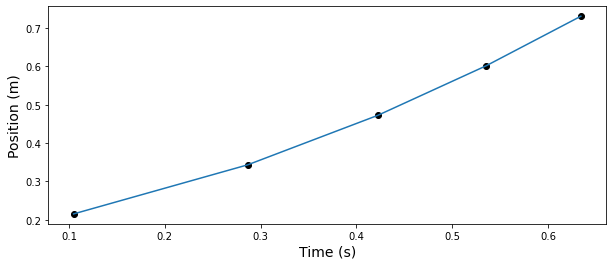

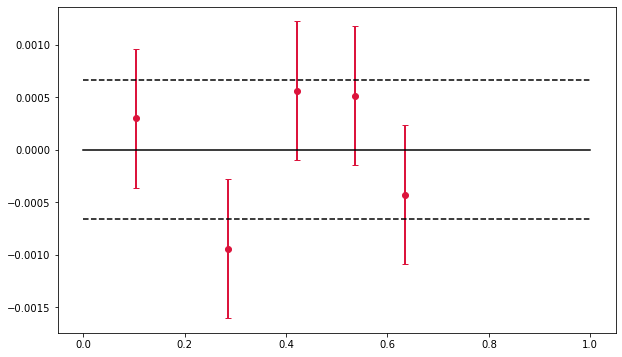

In [7]:
# 画图
f0_x = [x for x in range(0,2)]
f0_y = np.ones_like(f0_x)*0
f1_x = [x for x in range(0,2)]
f1_y = np.ones_like(f1_x)*ey
f2_x = [x for x in range(0,2)]
f2_y = np.ones_like(f2_x)*-ey


plt.figure(figsize=(10,4),facecolor='w')
plt.plot(x,y,'ro',markersize=6,color="black")
plt.xlabel('Time (s)',fontsize=14)
plt.ylabel('Position (m)',fontsize=14)
plt.plot(x1,y1)
plt.savefig('fig1',dpi=600)


fig, ax = plt.subplots(figsize=(10,6))
ax.errorbar(x, y-y1, ey, fmt='ro', color='crimson', elinewidth=2, capsize=3, capthick=1)  # errorbar
ax.plot(f0_x,f0_y,color='black')
ax.plot(f1_x,f1_y,color='black', linestyle='dashed')
ax.plot(f2_x,f2_y,color='black', linestyle='dashed')
plt.savefig('fig2',dpi=600)
plt.show()


In [8]:
g = (1.5343/0.2307)*(1+((2/5)*(0.01159**2/(0.01159**2 - 0.0060283**2))))
print(g)

10.297479305265862


In [9]:

# 求weighted mean ,9.536,10.328,,0.05,0.3
x = [9.808,9.839]
y = [0.02,0.21]
L1 = x
sigma_L1 = y
L_sum_up = np.zeros_like(L1)
L_sum_down = np.zeros_like(L1)
weighted_mean = float
weighted_sigma = float
for i in range(0,2):
    L_sum_up[i] = L1[i]/((sigma_L1[i])**2)
    L_sum_down[i] = 1/((sigma_L1[i])**2)
    print(L_sum_up)
    print(L_sum_down)
weighted_mean = np.sum(L_sum_up)/np.sum(L_sum_down)
print(weighted_mean)
weighted_sigma = np.sqrt(1/(np.sum(L_sum_down)))
print(weighted_sigma)


[24520.     0.]
[2500.    0.]
[24520.           223.10657596]
[2500.           22.67573696]
9.808278651685395
0.019909909451879045
